In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
netflix = pd.read_csv('netflix1.csv')

In [29]:
netflix

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [30]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [31]:
netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [32]:
total_movies_by_country = netflix.groupby(['type', 'country'])['show_id'].count().reset_index()
total_movies_by_country

,type,country,show_id
0,Movie,Argentina,56
1,Movie,Australia,61
2,Movie,Austria,8
3,Movie,Bangladesh,3
4,Movie,Belgium,9
...,...,...,...
133,TV Show,Ukraine,2
134,TV Show,United Arab Emirates,1
135,TV Show,United Kingdom,251
136,TV Show,United States,845


In [33]:
total_movies_by_country = total_movies_by_country.rename(columns={'show_id': 'count'})
total_movies_by_country

,type,country,count
0,Movie,Argentina,56
1,Movie,Australia,61
2,Movie,Austria,8
3,Movie,Bangladesh,3
4,Movie,Belgium,9
...,...,...,...
133,TV Show,Ukraine,2
134,TV Show,United Arab Emirates,1
135,TV Show,United Kingdom,251
136,TV Show,United States,845


In [34]:
movies_data = total_movies_by_country[total_movies_by_country['type'] == 'Movie'].sort_values('count', ascending=False).reset_index(drop=True)
tv_shows_data = total_movies_by_country[total_movies_by_country['type'] == 'TV Show'].sort_values('count', ascending=False).reset_index(drop=True)

In [35]:
print(movies_data.head(10))

    type         country  count
0  Movie   United States   2395
1  Movie           India    976
2  Movie  United Kingdom    387
3  Movie       Not Given    257
4  Movie          Canada    187
5  Movie          France    148
6  Movie           Spain    129
7  Movie           Egypt    109
8  Movie         Nigeria     96
9  Movie          Mexico     90


Text(124.59722222222221, 0.5, 'Count')

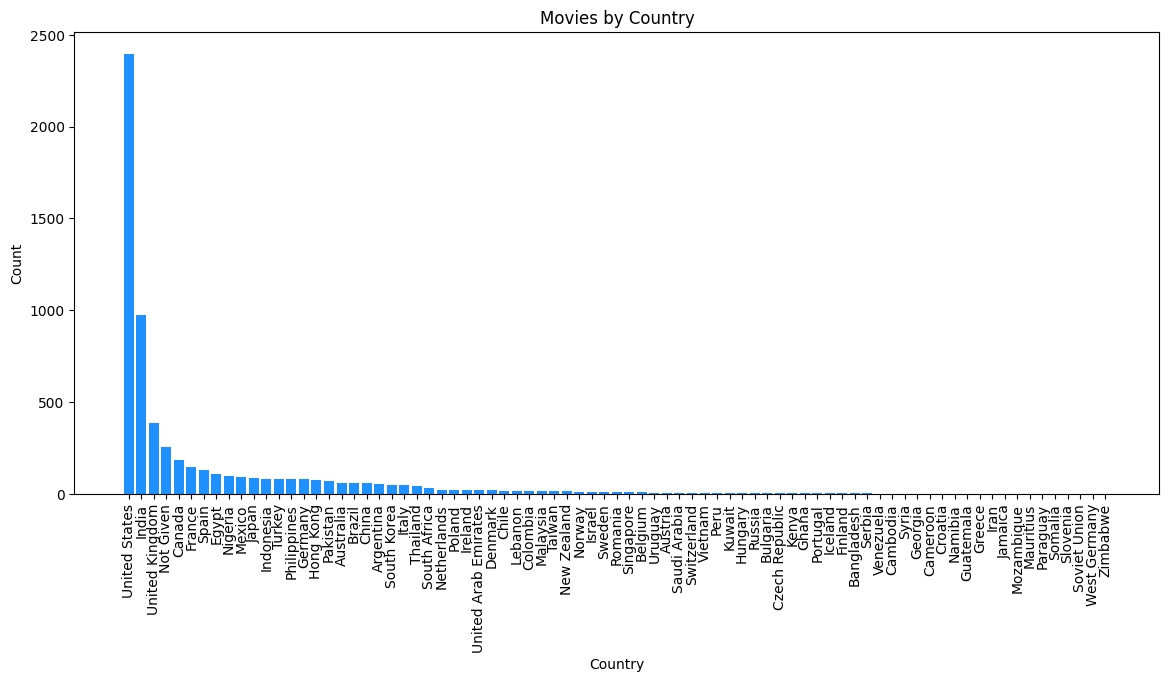

In [36]:
plt.figure(figsize=(14, 6))
plt.bar(movies_data['country'], movies_data['count'], color='dodgerblue')
plt.xticks(rotation=90)
plt.title('Movies by Country')
plt.xlabel('Country')
plt.savefig('Movies.png', dpi=300, bbox_inches='tight')
plt.ylabel('Count')

Text(133.34722222222223, 0.5, 'Count')

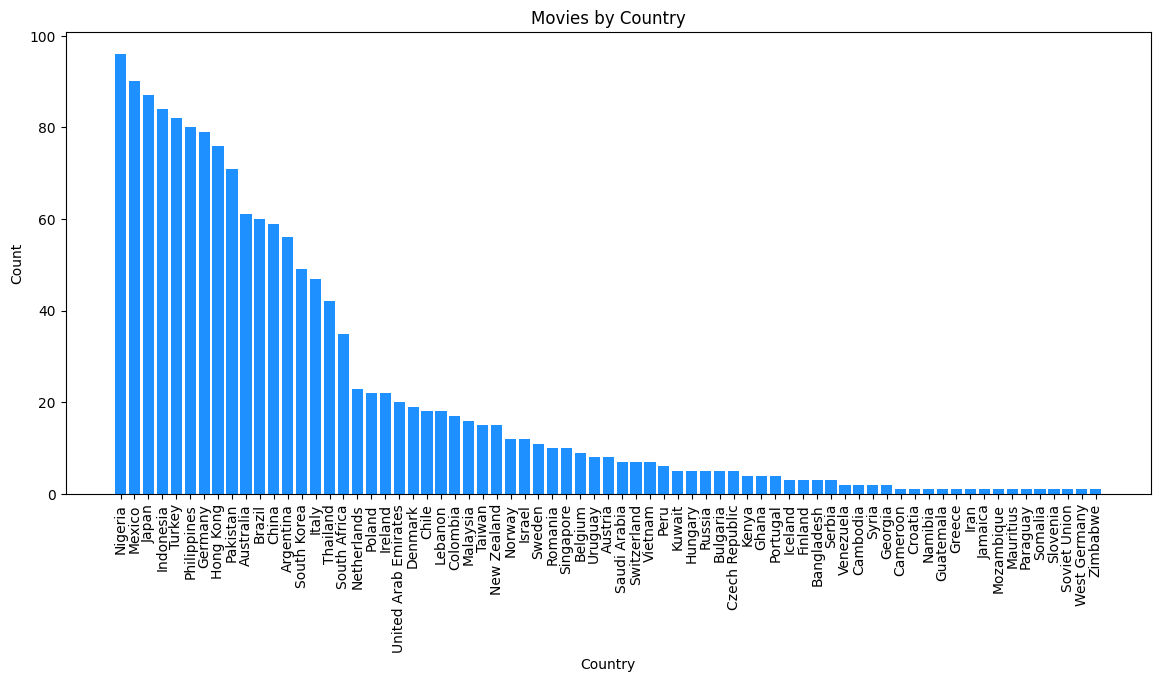

In [37]:
few_movies = movies_data[movies_data['count'] < 100]
plt.figure(figsize=(14, 6))
plt.bar(few_movies['country'], few_movies['count'], color='dodgerblue')
plt.xticks(rotation=90)
plt.title('Movies by Country')
plt.xlabel('Country')
plt.savefig('Movies2.png', dpi=300, bbox_inches='tight')
plt.ylabel('Count')

In [38]:
import pycountry_convert as pc

# mapping country names to continents
def get_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except KeyError:
        return None  # if country is missing

movies_data['continent'] = movies_data['country'].apply(get_continent)

In [39]:
print(movies_data.head())

    type         country  count continent
0  Movie   United States   2395        NA
1  Movie           India    976        AS
2  Movie  United Kingdom    387        EU
3  Movie       Not Given    257      None
4  Movie          Canada    187        NA


In [40]:
african_movies = movies_data[movies_data['continent'] == 'AF']
african_movies

,type,country,count,continent
7,Movie,Egypt,109,AF
8,Movie,Nigeria,96,AF
24,Movie,South Africa,35,AF
53,Movie,Kenya,4,AF
54,Movie,Ghana,4,AF
64,Movie,Cameroon,1,AF
66,Movie,Namibia,1,AF
71,Movie,Mozambique,1,AF
72,Movie,Mauritius,1,AF
74,Movie,Somalia,1,AF


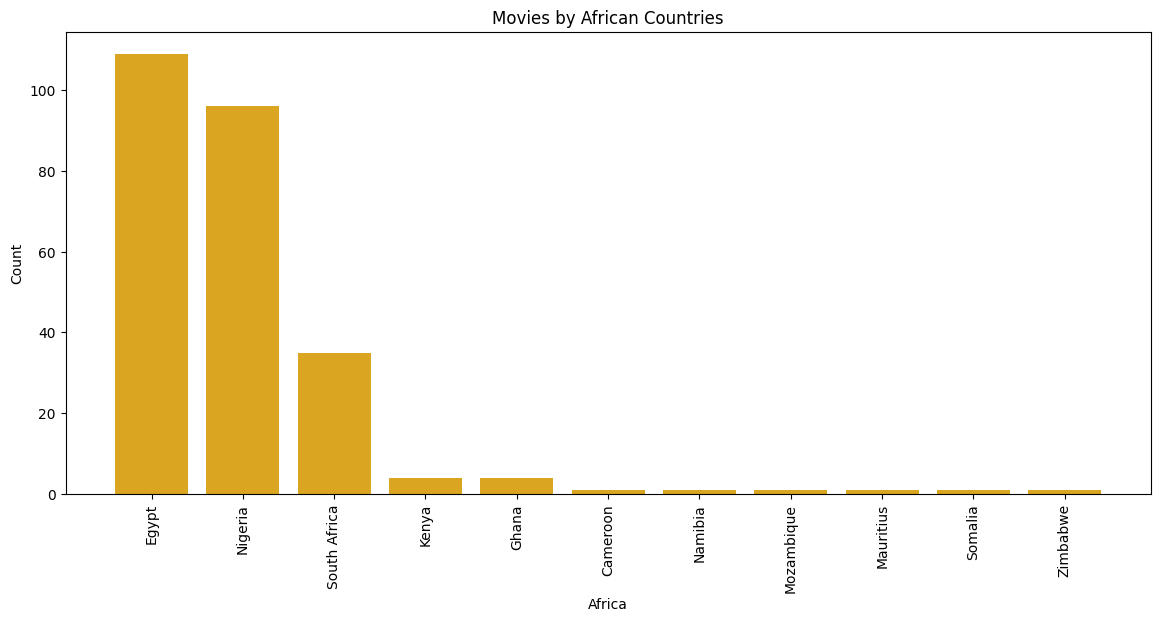

In [41]:
plt.figure(figsize=(14, 6))
plt.bar(african_movies['country'], african_movies['count'], color = 'goldenrod')
plt.xticks(rotation=90)
plt.title('Movies by African Countries')
plt.xlabel('Africa')
plt.ylabel('Count')
plt.savefig('African Movies.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
continents = movies_data['continent'].unique()
print(continents)

['NA' 'AS' 'EU' None 'AF' 'OC' 'SA']


In [43]:
countries_per_continent = movies_data.groupby(['continent'])['country'].count().sort_values(ascending=False).reset_index()
countries_per_continent

,continent,country
0,EU,26
1,AS,24
2,AF,11
3,SA,8
4,NA,5
5,OC,2


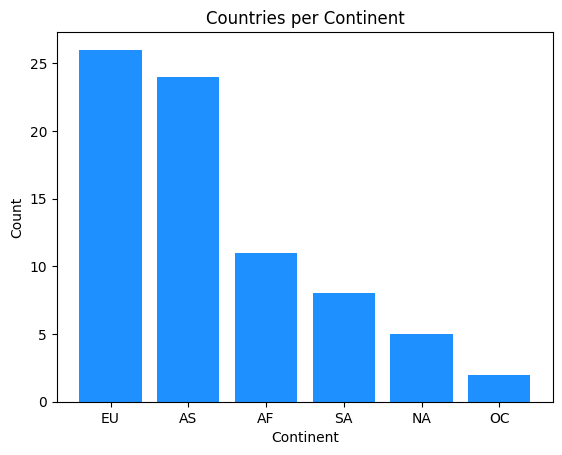

In [44]:
plt.bar(countries_per_continent['continent'], countries_per_continent['country'], color = 'dodgerblue')
plt.title('Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.savefig('Countries per Continent.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
movies_by_continent = movies_data.groupby(['continent'])['count'].sum().sort_values(ascending=False).reset_index()
movies_by_continent

,continent,count
0,NA,2674
1,AS,1726
2,EU,969
3,AF,254
4,SA,168
5,OC,76


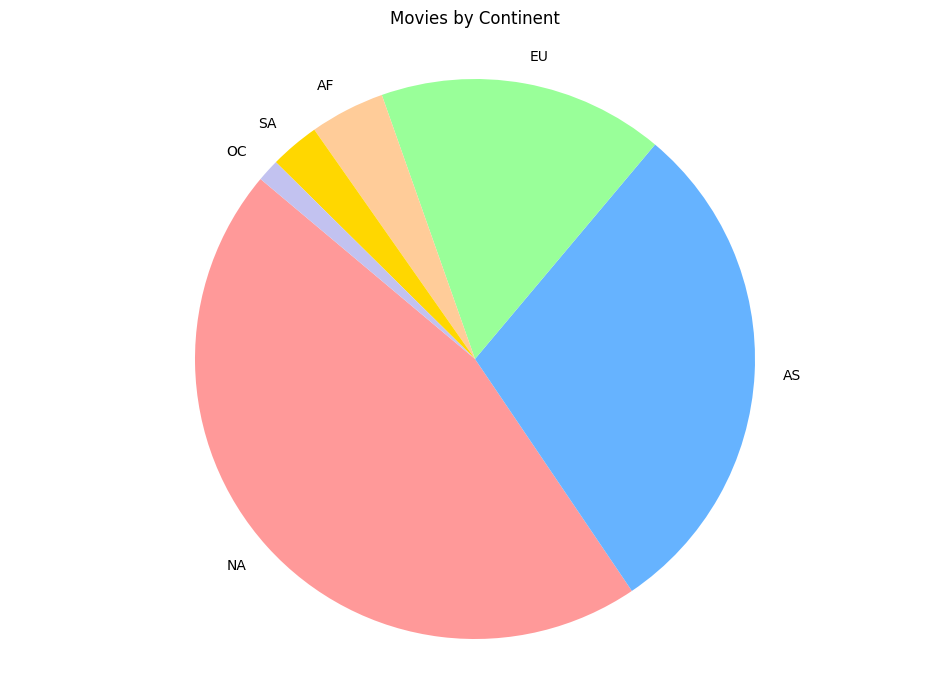

In [46]:
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#C2C2F0']
plt.figure(figsize=(12, 8))
plt.pie(movies_by_continent['count'], labels=movies_by_continent['continent'], startangle=140, colors=colors)
plt.title('Movies by Continent', pad=20)
plt.axis('equal')
plt.savefig('Movies by Continent1.png', dpi=300, bbox_inches='tight')
plt.show()

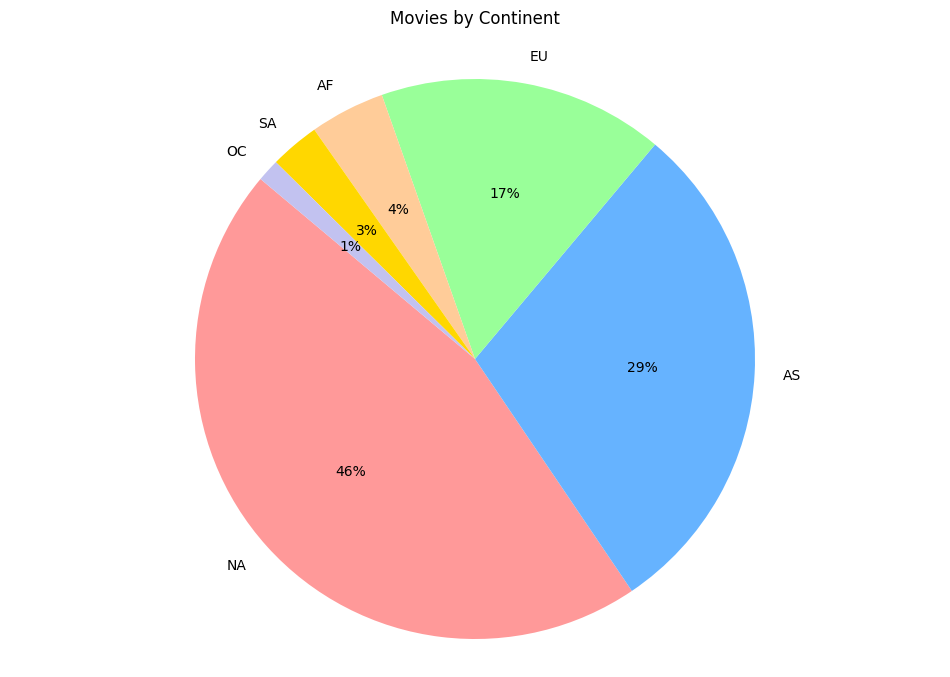

In [47]:
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#C2C2F0']
plt.figure(figsize=(12, 8))
plt.pie(movies_by_continent['count'], labels=movies_by_continent['continent'], autopct='%1.0f%%', startangle=140, colors=colors)
plt.title('Movies by Continent', pad=20)
plt.axis('equal')
plt.savefig('Movies by Continent2.png', dpi=300, bbox_inches='tight')
plt.show()

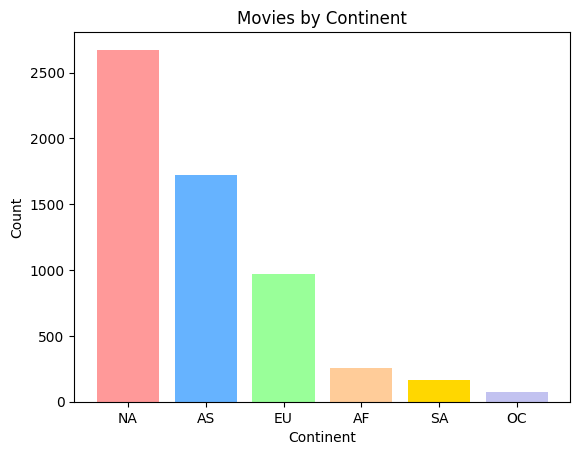

In [48]:
plt.bar(movies_by_continent['continent'], movies_by_continent['count'], color = colors)
plt.title('Movies by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.savefig('Movies by Continent3.png', dpi=300, bbox_inches='tight')
plt.show()

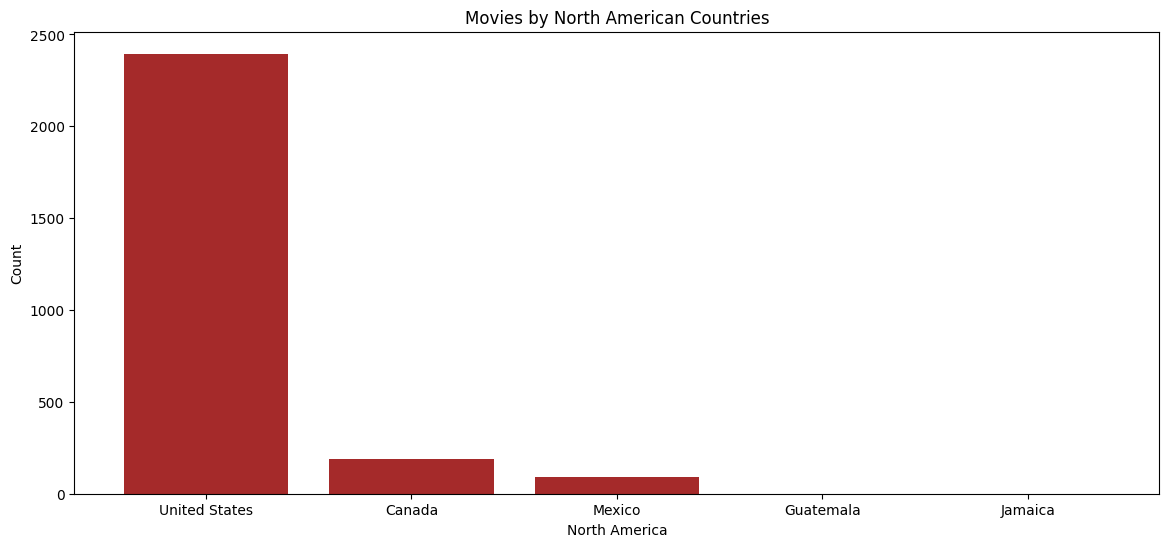

In [49]:
north_america_movies = movies_data[movies_data['continent'] == 'NA']
plt.figure(figsize=(14, 6))
plt.bar(north_america_movies['country'], north_america_movies['count'], color = 'brown')
plt.title('Movies by North American Countries')
plt.xlabel('North America')
plt.ylabel('Count')
plt.savefig('North American Movies.png', dpi=300, bbox_inches='tight')
plt.show()

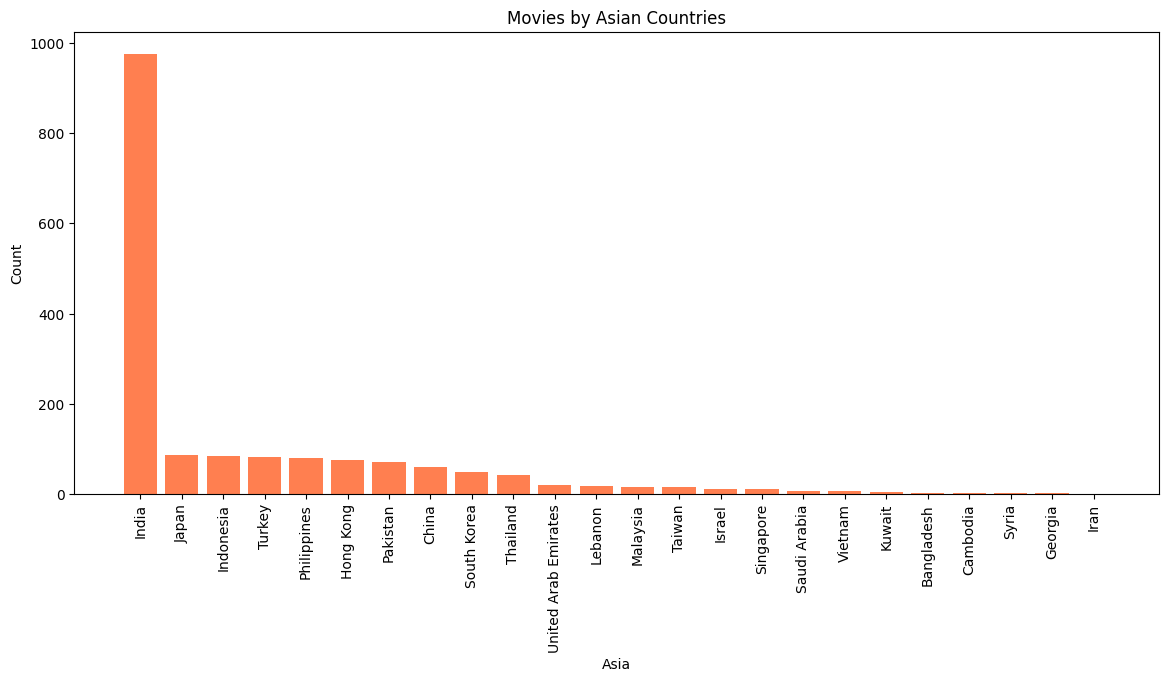

In [50]:
asia_movies = movies_data[movies_data['continent'] == 'AS']
plt.figure(figsize=(14, 6))
plt.bar(asia_movies['country'], asia_movies['count'], color = 'coral')
plt.xticks(rotation=90)
plt.title('Movies by Asian Countries')
plt.xlabel('Asia')
plt.ylabel('Count')
plt.savefig('Asian Movies.png', dpi=300, bbox_inches='tight')
plt.show()

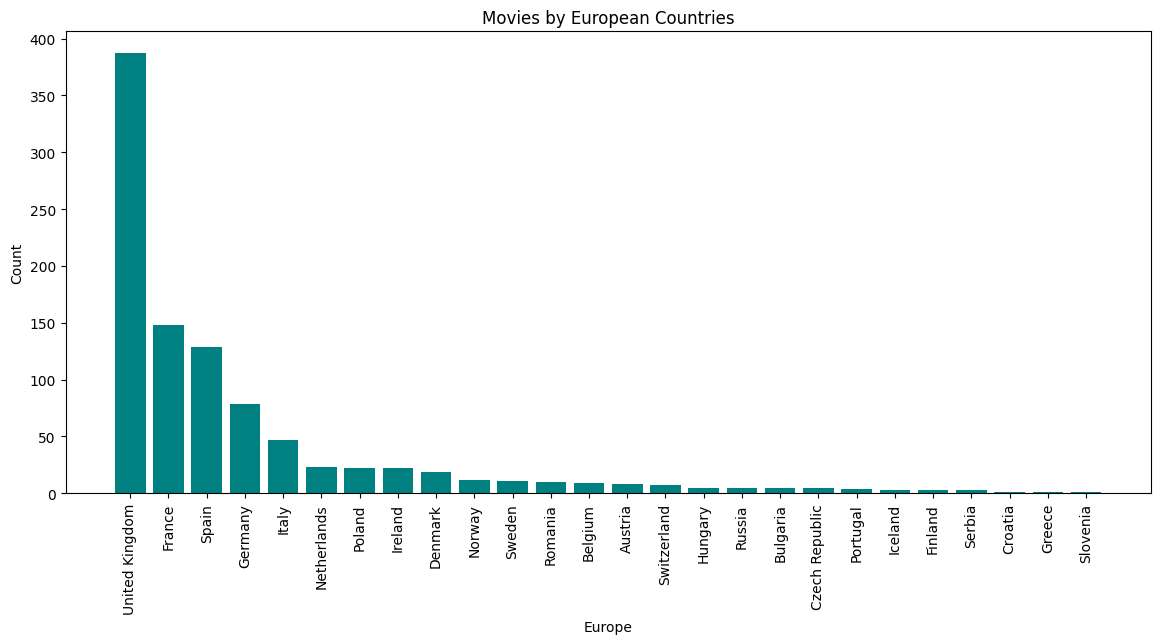

In [51]:
europe_movies = movies_data[movies_data['continent'] == 'EU']
plt.figure(figsize=(14, 6))
plt.bar(europe_movies['country'], europe_movies['count'], color = 'teal')
plt.xticks(rotation=90)
plt.title('Movies by European Countries')
plt.xlabel('Europe')
plt.ylabel('Count')
plt.savefig('European Movies.png', dpi=300, bbox_inches='tight')
plt.show()

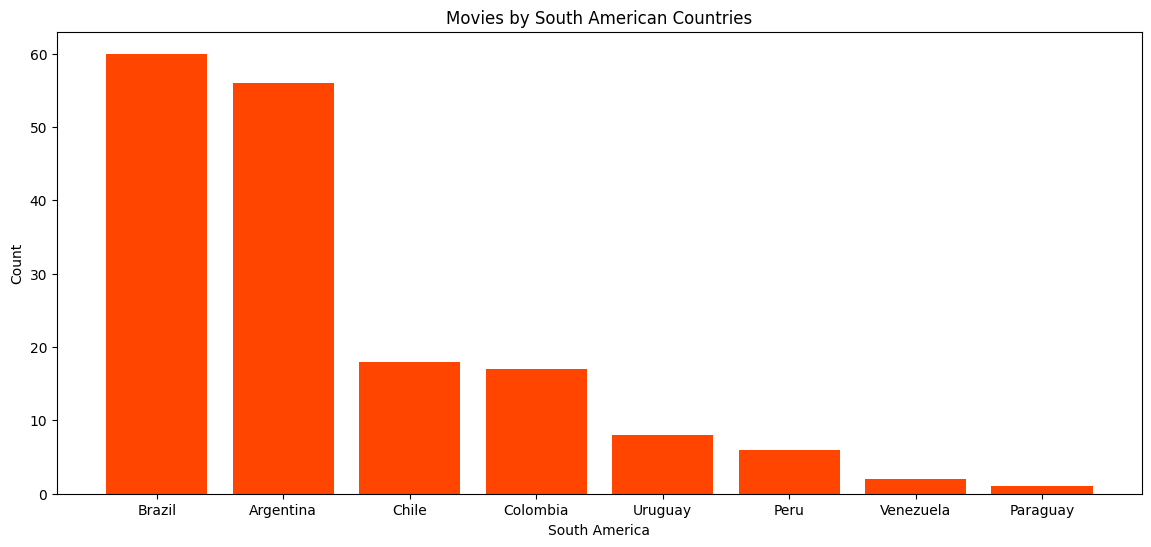

In [52]:
south_america_movies = movies_data[movies_data['continent'] == 'SA']
plt.figure(figsize=(14, 6))
plt.bar(south_america_movies['country'], south_america_movies['count'], color = 'orangered')
plt.title('Movies by South American Countries')
plt.xlabel('South America')
plt.ylabel('Count')
plt.savefig('South America Movies.png', dpi=300, bbox_inches='tight')
plt.show()

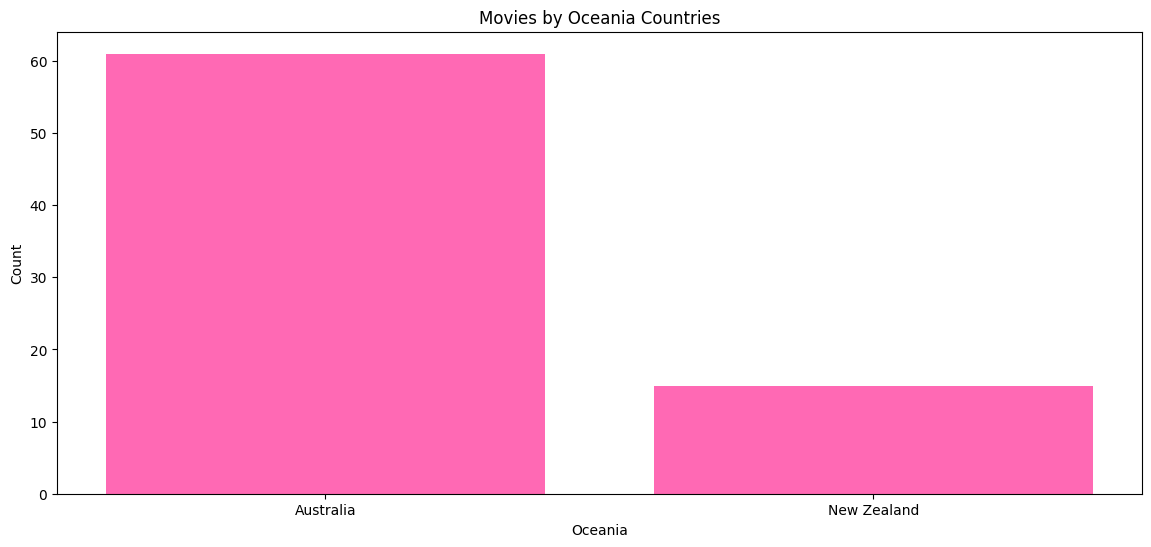

In [53]:
oceania_movies = movies_data[movies_data['continent'] == 'OC']
plt.figure(figsize=(14, 6))
plt.bar(oceania_movies['country'], oceania_movies['count'], color = 'hotpink')
plt.title('Movies by Oceania Countries')
plt.xlabel('Oceania')
plt.ylabel('Count')
plt.savefig('Oceania Movies.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
print(tv_shows_data.head())

      type         country  count
0  TV Show   United States    845
1  TV Show        Pakistan    350
2  TV Show  United Kingdom    251
3  TV Show           Japan    172
4  TV Show     South Korea    165


Text(133.34722222222223, 0.5, 'Count')

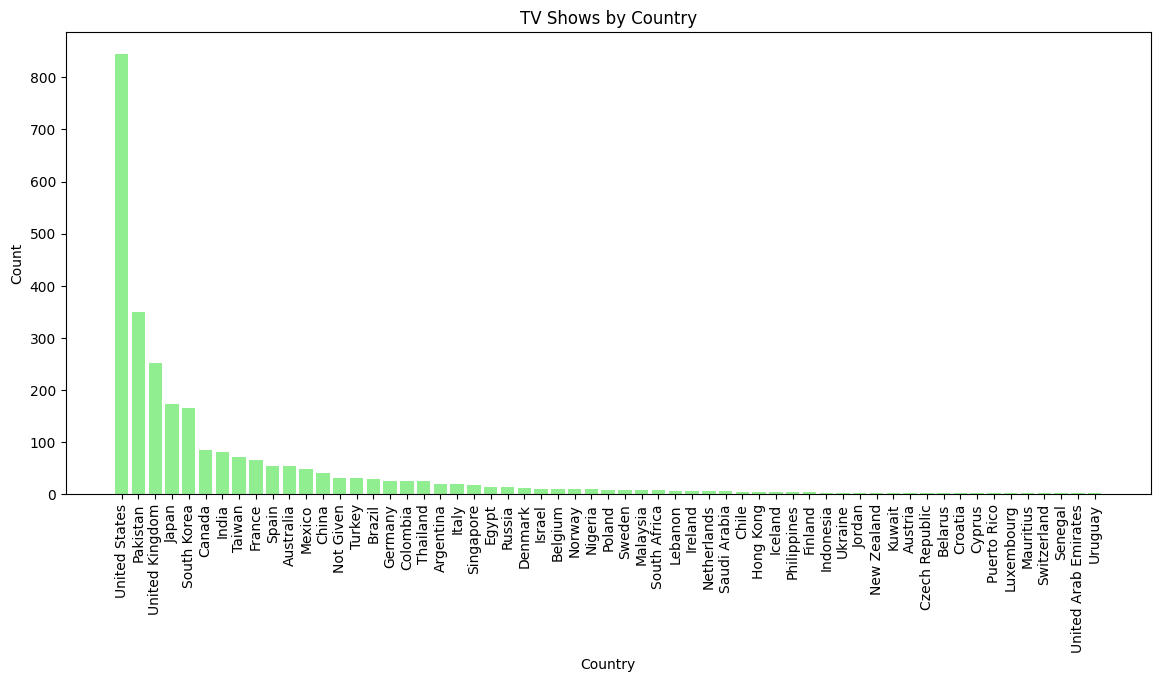

In [55]:
plt.figure(figsize=(14, 6))
plt.bar(tv_shows_data['country'], tv_shows_data['count'], color='lightgreen')
plt.xticks(rotation=90)
plt.title('TV Shows by Country')
plt.xlabel('Country')
plt.savefig('TV Shows.png', dpi=300, bbox_inches='tight')
plt.ylabel('Count')

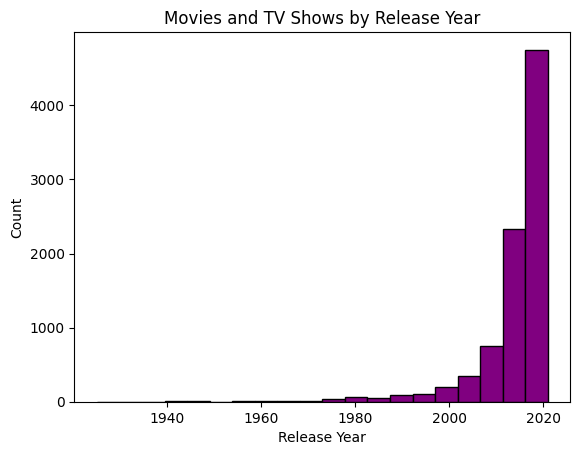

In [56]:
netflix['release_year'].hist(bins=20, color='purple', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movies and TV Shows by Release Year')
plt.grid(False)
plt.savefig('Release Year.png', dpi=300, bbox_inches='tight')
plt.show()

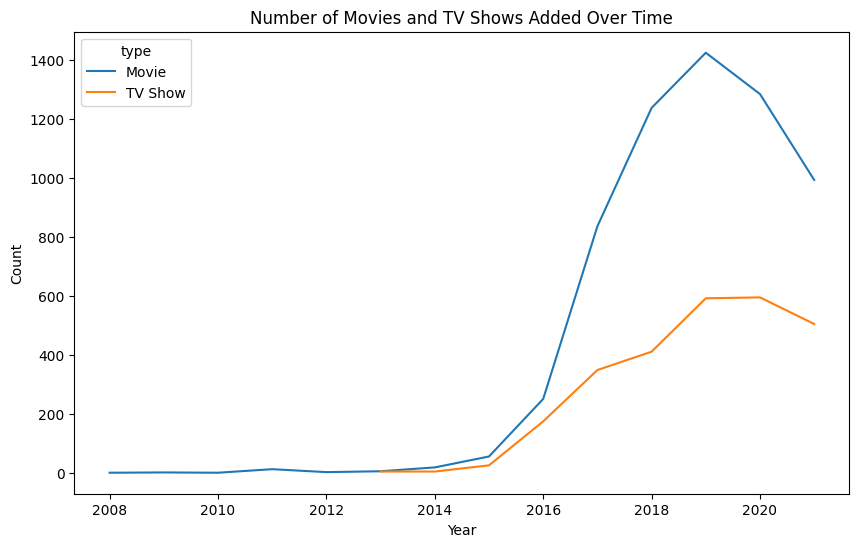

In [57]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
added_over_time = netflix.groupby([netflix['date_added'].dt.year, 'type'])['show_id'].count().unstack()
added_over_time.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Movies and TV Shows Added Over Time')
plt.savefig('Added.png', dpi=300, bbox_inches='tight')
plt.show()

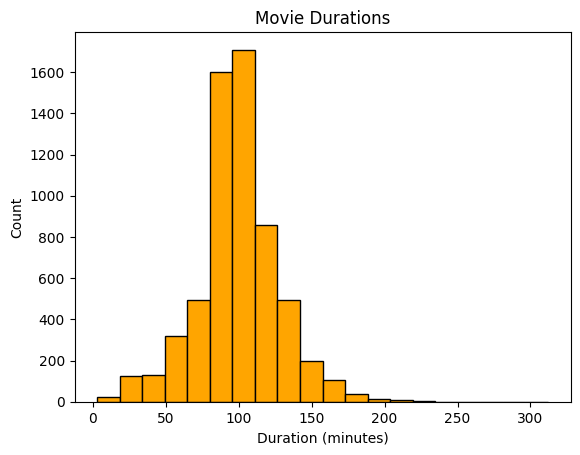

In [58]:
netflix_movies = netflix[netflix['type'] == 'Movie'].copy()  # Create a copy to avoid warnings
netflix_movies.loc[:, 'duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)

netflix_movies['duration'].hist(bins=20, color='orange', edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Movie Durations')
plt.grid(False)
plt.savefig('Movie Durations.png', dpi=300, bbox_inches='tight')
plt.show()

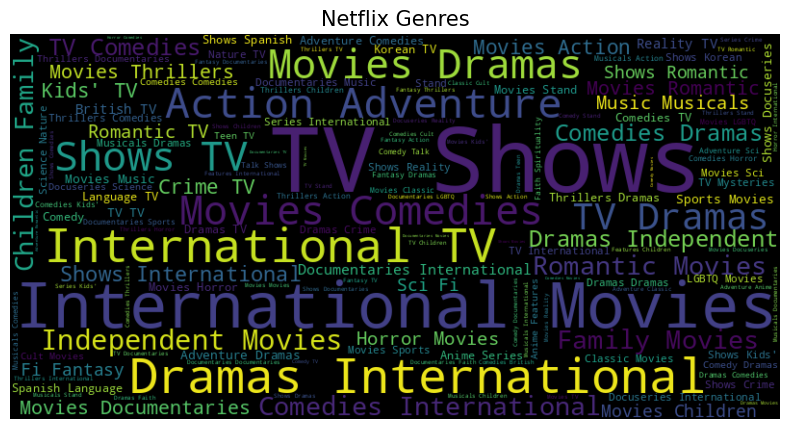

In [60]:
#Visualizing the most frequently occurring genres in the dataset
from wordcloud import WordCloud

all_genres = ' '.join(netflix['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Genres', fontsize=15)
plt.show()

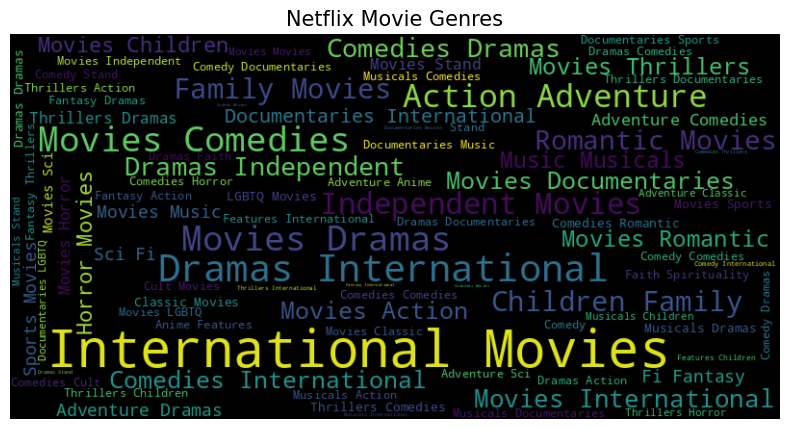

In [61]:
# Creating a word cloud from genres but for movies alone
movie_data = netflix[netflix['type'] == 'Movie']
movie_genres = ' '.join(movie_data['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(movie_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Movie Genres', fontsize=15)
plt.savefig('Movie Genres.png', dpi=300, bbox_inches='tight')
plt.show()

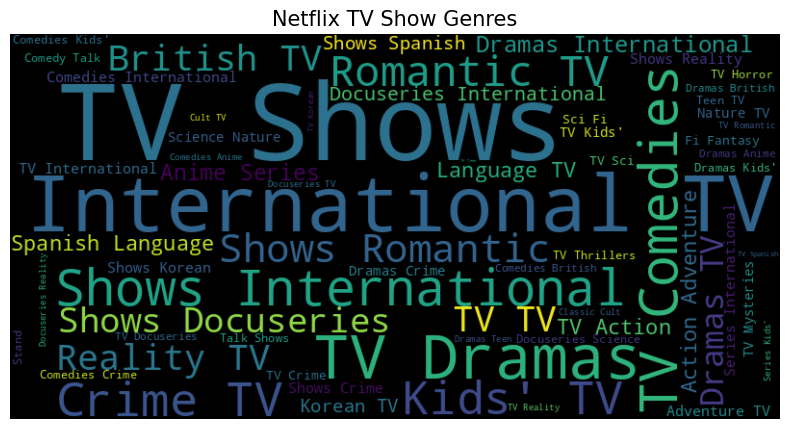

In [62]:
# Creating a word cloud from genres but for tv shows alone
tv_show_data = netflix[netflix['type'] == 'TV Show']
tv_show_genres = ' '.join(tv_show_data['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(tv_show_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix TV Show Genres', fontsize=15)
plt.savefig('TV Genre.png', dpi=300, bbox_inches='tight')
plt.show()

### Data Transformation

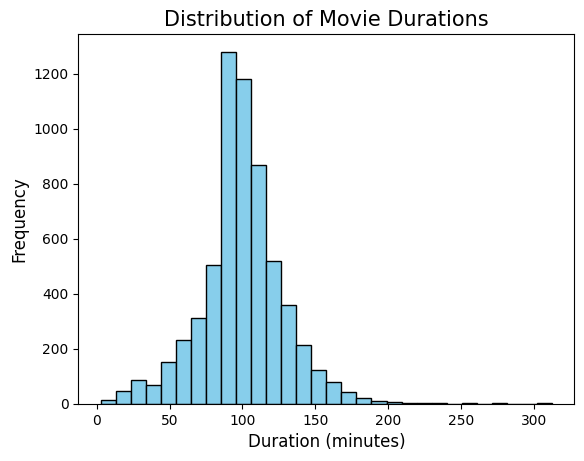

In [63]:
# Distribution of movie durations to reveal common lengths
# Filter for movies
movie_data = netflix[netflix['type'] == 'Movie'].copy()

movie_data['duration'] = movie_data['duration'].str.replace(' min', '', regex=False)  # Remove ' min'
movie_data = movie_data[movie_data['duration'].str.isnumeric()]  # Keep only numeric durations
movie_data['duration'] = movie_data['duration'].astype(int)

# Plot histogram of movie durations
plt.hist(movie_data['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations', fontsize=15)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('Duration Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

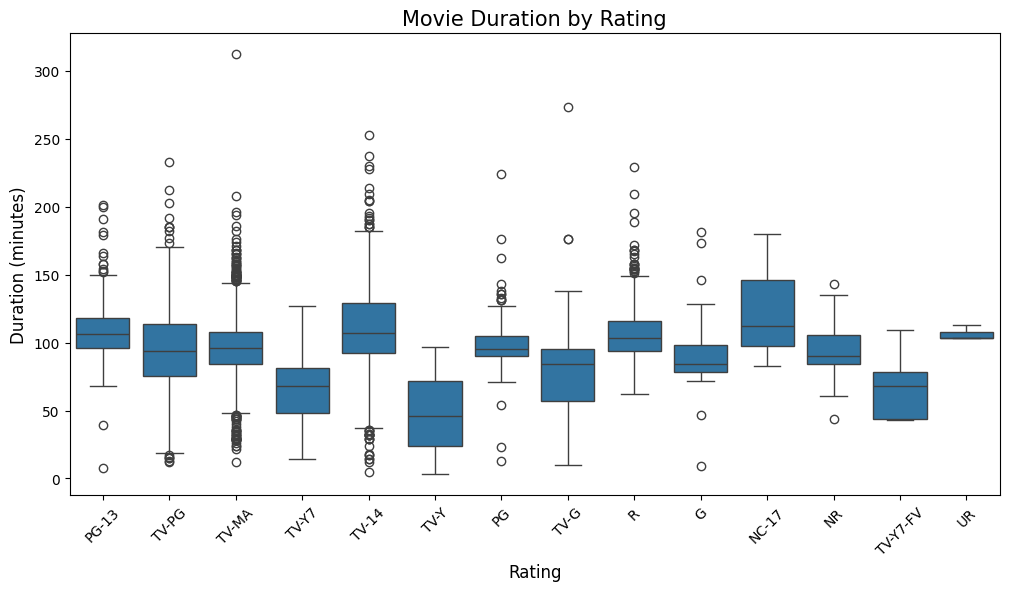

In [64]:
# Variation of duration with content rating
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration', data=movie_data)
plt.title('Movie Duration by Rating', fontsize=15)
plt.xticks(rotation=45)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.savefig('Duration by Rating.png', dpi=300, bbox_inches='tight')
plt.show()

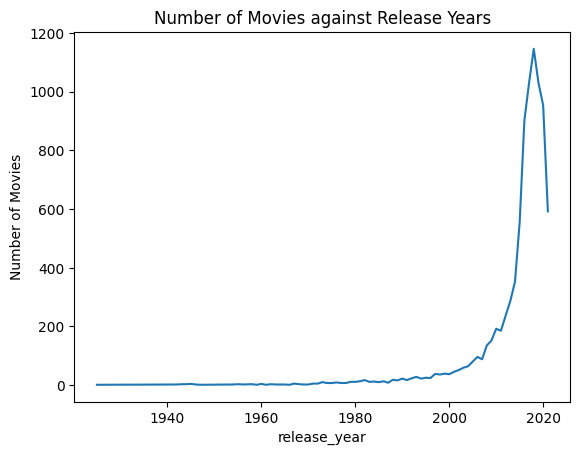

In [76]:
netflix.groupby(["release_year"])["title"].count().plot.line(
    x="release_year",
    y="title",
);
plt.title("Number of Movies against Release Years");
plt.ylabel("Number of Movies");

### Insights